# Persian Recursion

We will use numpy for this because it will perform significantly better than both `core` and `sympy` libraries.

## Preamble

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Approach

This example will be interactive, however at the the end I will rewrite it as a function, this has a few ramifications:

1. *Python* (and *Julia*) do not make variables available to parent functions
    - This is unlike `bash`, ***R*** and (I think anyway) *Mathematica*.
2. Global Variables need to be avoided
    - Global variables are both bad practice and also incur a performance cost, for this reason the matrix will need to be handled either as an attribute of a parent function or as an input / `return` value.

Then I think it would be nice to wrap this all in an interactive call to *Plotly*

## Constants

In [3]:
n = 8  # Number of Folds
# n = 3  # Number of Folds
z = 7  # Number for border (like a seed)
m = 16 # Number of Colours

## Make a Plot

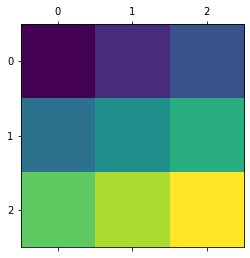

In [4]:
mat = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]])
plt.matshow(mat)

### Observe Properties of Matrices

#### Assigning Values

In [5]:
Observe that:

1. They count from zero, so careful
2. Multiple values can be assigned in one fell swoop

SyntaxError: invalid syntax (<ipython-input-5-d8095a400d47>, line 1)

In [6]:
mat = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]])
i  = 1;  j = 1
i -= 1; j -= 1

mat[0, 0] = mat[1, 1] = mat[2,2] = 99999
mat

array([[99999,     2,     3],
       [    4, 99999,     6],
       [    7,     8, 99999]])

#### Indexing Values

Observe to call an entire column the splice `:` character is used (like *Julia*):

In [7]:
mat[2,:]

array([    7,     8, 99999])

The dimension can only be left blank (like ***R*** **not** ***Julia***) when selecting rows not columns so avoid this:

In [8]:
mat[1,]

array([    4, 99999,     6])

##### Indexing a Range

In [9]:
a = np.array([[0.015, 0.235, 0.112], [0.234, 0.477, 0.837], [0.938, 0.926, 0.121], [0.980, 0.738, 0.888]])
a = np.round(a, 1)
a

array([[0. , 0.2, 0.1],
       [0.2, 0.5, 0.8],
       [0.9, 0.9, 0.1],
       [1. , 0.7, 0.9]])

This is very similar to ***R*** **except**, the end of the range is the limit not the endpoint of the range of values.

In [10]:
a[0:2, :]

array([[0. , 0.2, 0.1],
       [0.2, 0.5, 0.8]])

#### Negative Indexes

Some languages (such as *Mathematica*) use a negative index to denote indexing from right-to-left, as does *Python* (This is distinct from ***R*** which drops elements corresponding to those indices).

This can be very confusing with respect to ***O**ff **B**y **O**ne **B**ugs*, for example:

- `[-1,]`

    - **Mathematica**: The Last Row
    - **Python**: The Last Row
- `[1,]`

    - **Mathematica**: The First Row
    - **Python**: The Second Row
 - `[0,]` == `[-0,]`

    - **Mathematica**: Undefined
    - **Python**: The First Row



    

    

In [11]:
print(
    mat[-2,], '\n',
    mat[2,]
    )

[    4 99999     6] 
 [    7     8 99999]


## Make an empty Matrix

Obsere the indexing is a little confusing because:

- `0` is the first term
- `1` is the second term
- `-1` is the last term.

In [12]:
mat = np.empty([2**n+1, 2**n+1])
mat[:,0] = mat[:,-1] = mat[0,:] = mat[-1,:] = z
# mat

Another potential gotchya is that `np.empty` does not produce a matrix of zeros for want of performance, (I think it just grabs arbitrary values from memory), this is different from the `zeros` function made available by `sympy`.

## Decide on a function

A distinction from the way that a language like *Mathematica* works is that functions in *Python* are local and don't modify things outside, for this reason the use of `global` variables should be avoided in order to preserve the expected behaviour of python.

This means that unlike *Mathematica*, it will be necessary to take the matrix we building as input and `return` it as output.

It will also be ideal to pay attention to typing `floats` and `ints` appropriately.

In [13]:
def cx(l, r, t, b):
    new_col = (mat[t,l] + mat[t,r] +  mat[b,l] + mat[b,r]) % m
    return new_col.astype(int)

cx(1,2,0,0).astype(int)

12

## Build the function to Colour the Grid

So Now we need a function to replace the values of the centre column+row with the new number.

One thing to be careful with is the `/` operator, in python (and julia if using dynamic typing) this will lead to the `type` of the data becoming a `float` not an integer, this can be addressed by using the `int()` function, this is important however because indexing a matrix is **only valid for integers**.

As an aside the julia langauge addresses this by also introducing the ÷ operator, this combined with clearly typing integers, rationals, reals, complex and floats makes it a very powerful langauge for mat.

In [14]:
def colorgrid(l, r, t, b):
    ## define the centre column and row
    mc = int((l+r)/2); mr = int((t+b)/2)

    ## Assign the colour
    ## Notice that many matrix values were assigned
      ## Confusing but in this case b-1 on the matrix is b in python
    mat[(t+1):b,mc] = cx(l, r, t, b)
    mat[mr,(l+1):r] = cx(l, r, t, b)
    
# plt.matshow(mat)

colorgrid(0, mat.shape[0]-1, 0, mat.shape[0]-1)
mat.astype(int)
# plt.matshow(newmat)

array([[                   7,                    7,                    7,
        ...,                    7,                    7,
                           7],
       [                   7,                    0,                    0,
        ...,                    0,                    0,
                           7],
       [                   7,                    0,                    0,
        ...,                    0,                    0,
                           7],
       ...,
       [                   7, -9223372036854775808, -9223372036854775808,
        ..., -9223372036854775808, -9223372036854775808,
                           7],
       [                   7, -9223372036854775808, -9223372036854775808,
        ..., -9223372036854775808, -9223372036854775808,
                           7],
       [                   7,                    7,                    7,
        ...,                    7,                    7,
                           7]])

## Changing Variables outside Functions

***Variables are passed down to functions but not up in Python and Julia (Unlike ***R*** and `bash)***


It is not necessary to have `M` as a global variable, a variable outside a function will be accessible by python, the other way doesn't work, though, a variable from a function inside another function (**unlike *R***!) will be inaccessible unless it redefined as an attribute of that function or is returned by that function (or you could use a global variable but that is bad for your soul)

In [15]:
M = np.empty([2,2])

def change():
    M[1,1] = 999999999999
change()
M

array([[7.2000e+00, 4.1900e+01],
       [1.3575e+01, 1.0000e+12]])

## Putting it All Together

Now that there this function works we can modify it so that it calls itself again to do each corner. 

Calling itself will lead to the function occuring again and calling itself for the next iteration of squares and so on, this behaviour is known as recursion.

Any problem that can be solved via recursion can be solved via a loop and vice versa, One method may however provide a more "*elegant*" solution to the problem.

Much like a loop has a condition which leads to a `break` (either a `while` test, an `if` list or even just a hard `break`) a recursive function will require some `if` statement determining whether or not it will run so that there is some endpoint.

In this case it is only appropriate for the function to run if `l`eft column value has more that *cell* seperating it from the `r`ight most column (or equivalently in this case top/bottom rows). So the condition for the function proceeding is if `l < r - 1`.

This is demonstrated below.

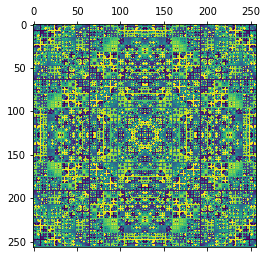

In [16]:
def colorgrid(l, r, t, b):
    # print(l, r, t, b)
    if (l < r -1):
        ## define the centre column and row
        mc = int((l+r)/2); mr = int((t+b)/2)

        ## Assign the colour
        mat[(t+1):b,mc] = cx(l, r, t, b)
        mat[mr,(l+1):r] = cx(l, r, t, b)

        ## Now Recall this function on the four new squares
                #l r   t   b
        colorgrid(l, mc, t, mr)    # NW
        colorgrid(mc, r, t, mr)    # NE
        colorgrid(l, mc, mr, b)    # SW
        colorgrid(mc, r, mr, b)    # SE 
        


colorgrid(0, mat.shape[0]-1, 0, mat.shape[0]-1)
mat.astype(int)
plt.matshow(mat)

Given that this image is symmetric we know that the algorighm has been successfull and we may wrap everything into a function.

Ideally all stand-alone scripts should be inside a function, even if it's a `main` function, this can make programs more modular and easier to work with, so before starting making a standalone piece of code consider using a template to the effect of:

```python
def main():
    print(nicewords())
def nicewords():
    return "Hello World"

main()
```

Naively [^nv] an attempt to combine this procedure into a function may go something like this:

[^nv]: Atleast naively if you're coming from an ***R*** and/or `bash` background

In [17]:
%%script false --no-raise-error
# https://stackoverflow.com/a/56247673
# m is colours
# n is number of folds
# Z is number for border
# cx is a function to transform the variables
def main(m, n, z, cx):
    import numpy as np

    # Make the Empty Matrix
    mat = np.empty([2**n+1, 2**n+1])
    
    
    # Fill the Borders
    mat[:,0] = mat[:,-1] = mat[0,:] = mat[-1,:] = z

    # Colour the Grid
    colorgrid(0, mat.shape[0]-1, 0, mat.shape[0]-1)

    # Plot the Matrix
    plt.matshow(mat)


# Define Helper Functions
def colorgrid(l, r, t, b):
    # print(l, r, t, b)
    if (l < r -1):
        ## define the centre column and row
        mc = int((l+r)/2); mr = int((t+b)/2)

        ## Assign the colour
        mat[(t+1):b,mc] = cx(l, r, t, b)
        mat[mr,(l+1):r] = cx(l, r, t, b)

        ## Now Recall this function on the four new squares
                #l r   t   b
        colorgrid(l, mc, t, mr)    # NW
        colorgrid(mc, r, t, mr)    # NE
        colorgrid(l, mc, mr, b)    # SW
        colorgrid(mc, r, mr, b)    # SE 
    
def cx(l, r, t, b):
    new_col = (mat[t,l] + mat[t,r] +  mat[b,l] + mat[b,r]) % m
    return new_col.astype(int)

main(4,4, 1, cx)

This naive attempt will not work however.

This restructuring, unfourtunately, has some ramifications, *Python* and *Julia* are unable to access variables created in functions above them (this behaviour is unlike ***R*** and `bash` (and maybe *Mathematica* ?) which can be very confusing at first.). 

This behaviour may motivate you not to use a `main()` function but this is a mistep that should be avoided because a variable called outside a function is inherently global [CITE] and global variables can have an impact on performance in Juia ([see the docs](https://docs.julialang.org/en/latest/manual/performance-tips/)) and python [See this example](https://stackoverflow.com/a/12590209)

There are ~~three~~ [^gl] two ways to deal with this in *Python*:

1. create function attributes.
    - the variable `mat` will be inaccessible from inside functions called, if however we assign the variable `main.mat`, this will be accessible. This can be combined with the fact that *Python* links rather than copies variables to easily make a variable accessible outside a function as an attribute. This is demonstrated below with the `mat` variable.
2. Alternatively variables can be passed to functions as variables
    - This is demonstrated by passing `m` down through `colorgrid` into `cx`

[^gl]: global variables are bad for your health.

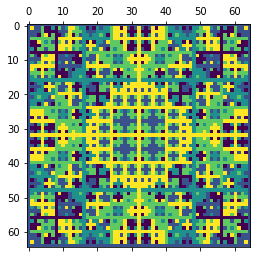

In [18]:
# m is colours
# n is number of folds
# Z is number for border
# cx is a function to transform the variables
def main(m, n, z, cx):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Make the Empty Matrix
    mat = np.empty([2**n+1, 2**n+1])
    main.mat = mat
    
    # Fill the Borders
    mat[:,0] = mat[:,-1] = mat[0,:] = mat[-1,:] = z

    # Colour the Grid
    colorgrid(0, mat.shape[0]-1, 0, mat.shape[0]-1, m)

    # Plot the Matrix
    plt.matshow(mat)


# Define Helper Functions
def colorgrid(l, r, t, b, m):
    # print(l, r, t, b)
    if (l < r -1):
        ## define the centre column and row
        mc = int((l+r)/2); mr = int((t+b)/2)

        ## Assign the colour
        main.mat[(t+1):b,mc] = cx(l, r, t, b, m)
        main.mat[mr,(l+1):r] = cx(l, r, t, b, m)

        ## Now Recall this function on the four new squares
                #l r   t   b
        colorgrid(l, mc, t, mr, m)    # NW
        colorgrid(mc, r, t, mr, m)    # NE
        colorgrid(l, mc, mr, b, m)    # SW
        colorgrid(mc, r, mr, b, m)    # SE 
    
def cx(l, r, t, b, m):
    new_col = (main.mat[t,l] + main.mat[t,r] +  main.mat[b,l] + main.mat[b,r]) % m
    return new_col.astype(int)

main(5,6, 1, cx)

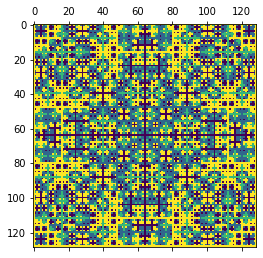

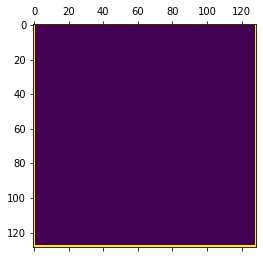

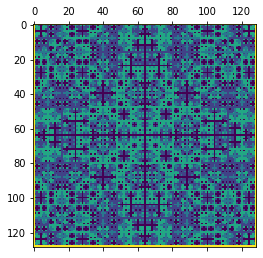

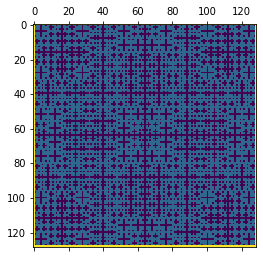

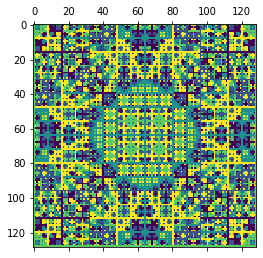

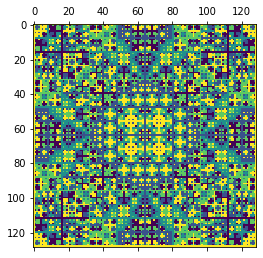

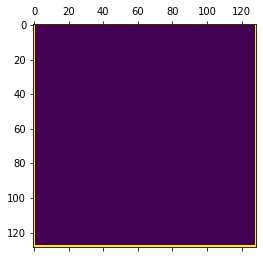

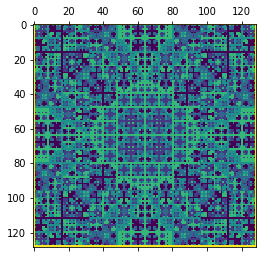

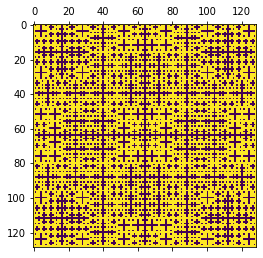

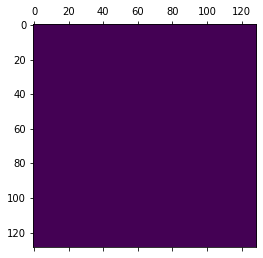

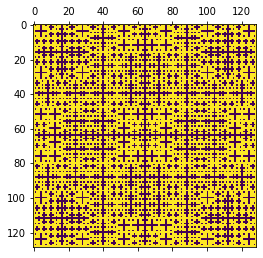

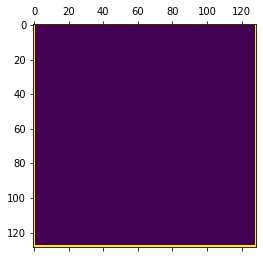

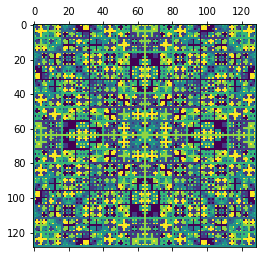

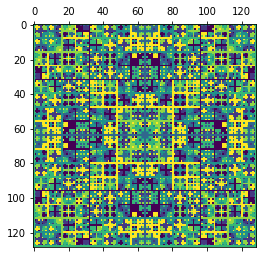

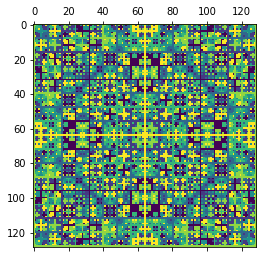

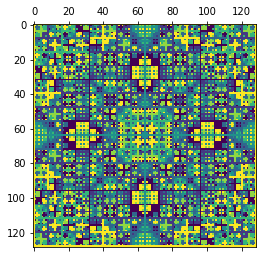

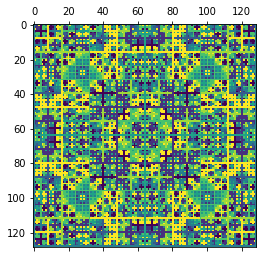

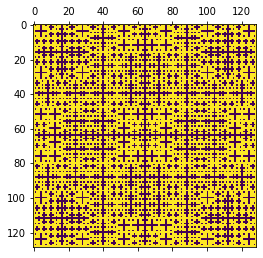

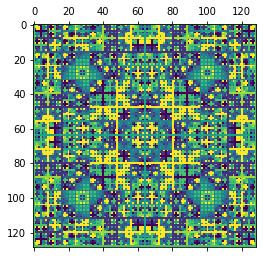

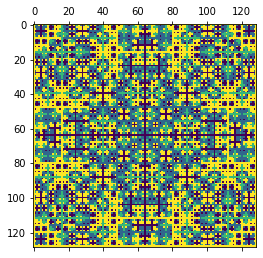

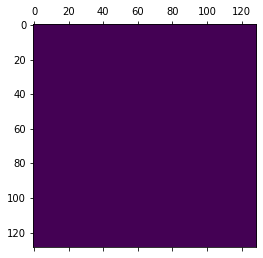

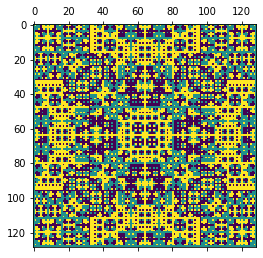

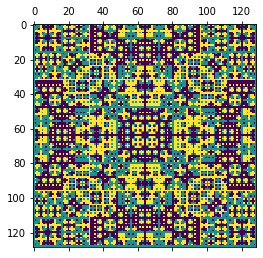

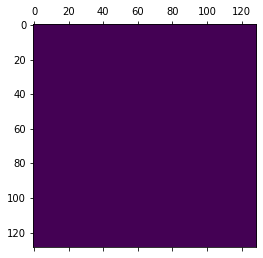

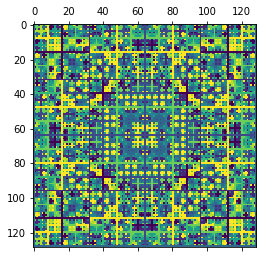

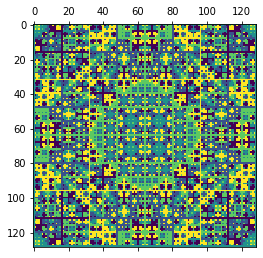

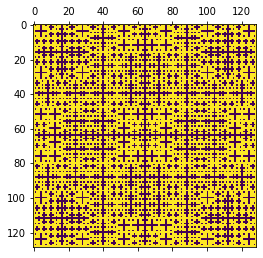

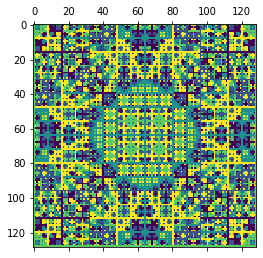

In [26]:
for i in range(4,11):
    for j in range(3, 7):
        main(i,7, j, cx)